# Predicting fake news from the body text of news articles
By Sarah Gauthier, Jessie Liang and Vinay Valson 2025-11-19

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import(
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline, make_pipeline
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Summary

## Introduction

## Methods & Results

In [2]:
true_url = "https://raw.githubusercontent.com/jessie-liang/522data/refs/heads/main/True.csv" 
fake_url = "https://raw.githubusercontent.com/jessie-liang/522data/refs/heads/main/Fake.csv"
true_df = pd.read_csv(true_url)
fake_df = pd.read_csv(fake_url)

In [3]:
true_df['target'] = 'True'
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [4]:
fake_df['target'] = 'Fake'
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [5]:
complete_df = pd.concat([true_df, fake_df])

# Split into train/test data sets
train_df, test_df = train_test_split(
    complete_df, train_size=0.80, random_state=123
)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35918 entries, 4453 to 15725
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   target   35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [7]:
alt.data_transformers.enable('vegafusion')

count_chart = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('count():Q', title='Count'),
    y=alt.Y('target:N', title='Label'),
    color='target:N'
)

count_chart

alt.Chart(...)

In [8]:
fake_text = train_df[train_df['target'] == 'Fake']['text']
true_text = train_df[train_df['target'] == 'True']['text']
fake_words = fake_text.str.cat(sep=" ")
true_words = true_text.str.cat(sep=" ")

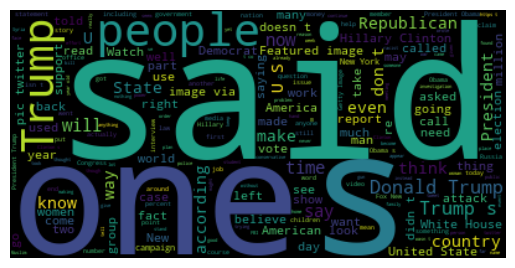

In [9]:
wordcloud_fake = WordCloud().generate(fake_words)
plt.figure()
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.show()

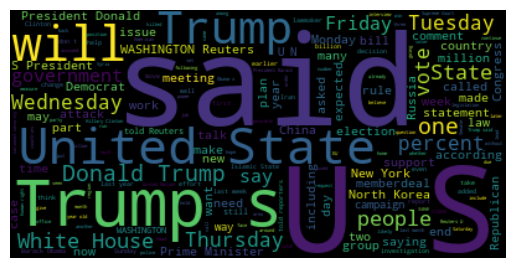

In [10]:
wordcloud_true = WordCloud().generate(true_words)
plt.figure()
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis("off")
plt.show()

## Discussion

## References